In [1]:
import pandas as pd
import numpy as np

def load_csv(route):
    data = pd.read_csv(route)
    data = data[data.columns[1:]]
    data["Time stamp"] = data["Time stamp"].astype(int)
    data = data.set_index(data["File name"] + data["Time stamp"].astype(str))
    return data

In [2]:
den_train = load_csv("/Users/harmonialeo/Downloads/gen4_train_density.csv")
den_val = load_csv("/Users/harmonialeo/Downloads/gen4_val_density.csv")
den_test = load_csv("/Users/harmonialeo/Downloads/gen4_test_density.csv")

In [3]:
den_all = den_train.append(den_val).append(den_test)
#den_all = den_train

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

No handles with labels found to put in legend.


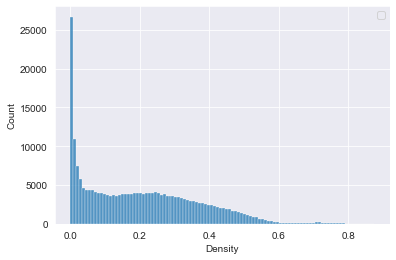

In [5]:
sns.histplot(den_all["Density"])
plt.legend()

No handles with labels found to put in legend.


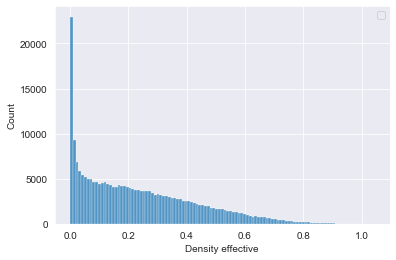

In [6]:
sns.histplot(den_all["Density effective"])
plt.legend()

<AxesSubplot:xlabel='Density effective', ylabel='Count'>

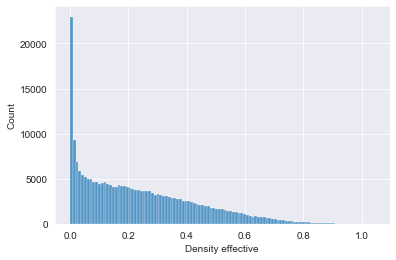

In [7]:
den_eff = den_all["Density effective"] + 1e-8
sns.histplot(den_eff)

In [12]:
from pomegranate import *

model = GeneralMixtureModel.from_samples([GammaDistribution], 2, den_eff[:,None])
model

<ipython-input-12-c54144569287>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model = GeneralMixtureModel.from_samples([GammaDistribution], 2, den_eff[:,None])


{
    "class" : "GeneralMixtureModel",
    "distributions" : [
        {
            "class" : "Distribution",
            "name" : "IndependentComponentsDistribution",
            "parameters" : [
                [
                    {
                        "class" : "Distribution",
                        "name" : "GammaDistribution",
                        "parameters" : [
                            3.9308305459025137,
                            11.225000417646893
                        ],
                        "frozen" : false
                    }
                ],
                [
                    1.0
                ]
            ],
            "frozen" : false
        },
        {
            "class" : "Distribution",
            "name" : "IndependentComponentsDistribution",
            "parameters" : [
                [
                    {
                        "class" : "Distribution",
                        "name" : "GammaDistribution",
                   

<ipython-input-13-a84448b09793>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  sns.lineplot(den_eff, model.distributions[0].probability(den_eff[:,None]), label="Distribution 1")
/Users/harmonialeo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-13-a84448b09793>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  sns.lineplot(den_eff, model.distributions[1].probability(den_eff[:,None]), label="Distribution 2")
/Users/harmonialeo/o

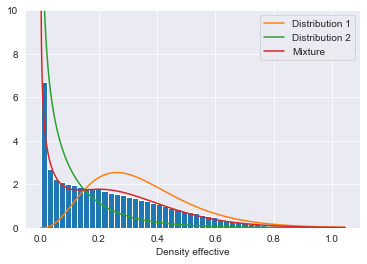

In [13]:
plt.hist(den_eff, bins=50, density=True, stacked=True)
sns.lineplot(den_eff, model.distributions[0].probability(den_eff[:,None]), label="Distribution 1")
sns.lineplot(den_eff, model.distributions[1].probability(den_eff[:,None]), label="Distribution 2")
sns.lineplot(den_eff, model.probability(den_eff[:,None]), label="Mixture")
plt.legend()
plt.ylim((0,10))
plt.show()

<AxesSubplot:>

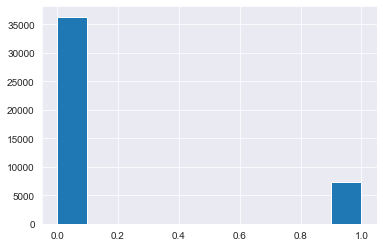

In [10]:
den_test["type"] = np.where(den_test["Density effective"] > 0.03, 0, 1)
den_test["type"].hist()

In [11]:
(den_test["Density effective"] > 0.03).sum()/len(den_test["Density effective"])

0.8321614255285037

<ipython-input-104-05c36e452a3e>:12: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  axes3d = Axes3D(fig)


(0.0, 100.0)

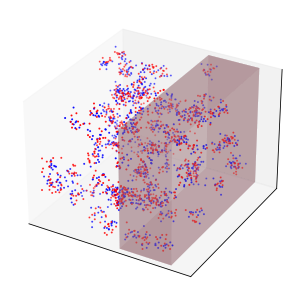

In [104]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import numpy as np

anchors = 100
count = 10
denseyz = 3
densex = 30

np.random.seed(10)
fig = plt.figure()
axes3d = Axes3D(fig)
xs_anchor = np.random.uniform(0,1000,anchors)
ys_anchor = np.random.uniform(0,100,anchors)
zs_anchor = np.random.uniform(0,100,anchors)
xs = np.random.normal(xs_anchor,densex,(count,anchors)).reshape(count*anchors)
ys = np.random.normal(ys_anchor,denseyz,(count,anchors)).reshape(count*anchors)
zs = np.random.normal(zs_anchor,denseyz,(count,anchors)).reshape(count*anchors)
axes3d.scatter3D(xs,ys,zs,color="r",s=1)
xs = np.random.normal(xs_anchor,densex,(count,anchors)).reshape(count*anchors)
ys = np.random.normal(ys_anchor,denseyz,(count,anchors)).reshape(count*anchors)
zs = np.random.normal(zs_anchor,denseyz,(count,anchors)).reshape(count*anchors)
axes3d.scatter3D(xs,ys,zs,color="b",s=1)
Y,Z = np.meshgrid([0,0,100,100],[0,100,0,100])
axes3d.plot_surface(np.zeros_like(Z) + 600,Y,Z,color = "pink",alpha=0.1)
axes3d.plot_surface(np.zeros_like(Z) + 1000,Y,Z,color = "pink",alpha=0.1)
X,Y = np.meshgrid([600,1000,1000,600],[0,100,0,100])
axes3d.plot_surface(X,Y,np.zeros_like(X) + 100,color = "pink",alpha=0.1)
axes3d.plot_surface(X,Y,np.zeros_like(X),color = "pink",alpha=0.1)
X,Z = np.meshgrid([600,1000,1000,600],[0,100,0,100])
axes3d.plot_surface(X,np.zeros_like(X) + 100,Z,color = "pink",alpha=0.1)
axes3d.plot_surface(X,np.zeros_like(X),Z,color = "pink",alpha=0.1)
axes3d.set_yticks([])
axes3d.set_xticks([])
axes3d.set_zticks([])
axes3d.set_ylim3d(0,100)
axes3d.set_zlim3d(0,100)

<ipython-input-115-fdc270a2e359>:12: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  axes3d = Axes3D(fig)


(0.0, 100.0)

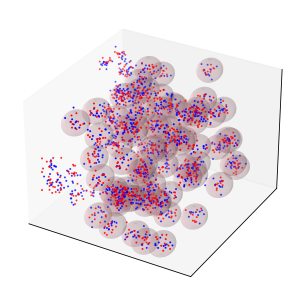

In [115]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import numpy as np

anchors = 100
count = 10
denseyz = 3
densex = 30

np.random.seed(10)
fig = plt.figure()
axes3d = Axes3D(fig)
xs_anchor = np.random.uniform(0,1000,anchors)
ys_anchor = np.random.uniform(0,100,anchors)
zs_anchor = np.random.uniform(0,100,anchors)
xs = np.random.normal(xs_anchor,densex,(count,anchors)).reshape(count*anchors)
ys = np.random.normal(ys_anchor,denseyz,(count,anchors)).reshape(count*anchors)
zs = np.random.normal(zs_anchor,denseyz,(count,anchors)).reshape(count*anchors)
axes3d.scatter3D(xs,ys,zs,color="r",s=1)
xs = np.random.normal(xs_anchor,densex,(count,anchors)).reshape(count*anchors)
ys = np.random.normal(ys_anchor,denseyz,(count,anchors)).reshape(count*anchors)
zs = np.random.normal(zs_anchor,denseyz,(count,anchors)).reshape(count*anchors)
axes3d.scatter3D(xs,ys,zs,color="b",s=1)
# Y,Z = np.meshgrid(np.linspace(90-3*denseyz,90+3*denseyz),np.linspace(90-3*denseyz,90+3*denseyz))
# X1 = 90 + np.sqrt(((3*densex)**2) * (1-(Y-90)**2/(((3*denseyz)**2))-(Z-90)**2/(((3*denseyz)**2))))
# X2 = 90 - np.sqrt(((3*densex)**2) * (1-(Y-90)**2/(((3*denseyz)**2))-(Z-90)**2/(((3*denseyz)**2))))
# axes3d.plot_surface(X1,Y,Z,color = "orange",alpha=0.3)
# axes3d.plot_surface(X2,Y,Z,color = "orange",alpha=0.3)
for x_anchor, y_anchor, z_anchor in zip(xs_anchor,ys_anchor,zs_anchor):
    if x_anchor > np.percentile(xs_anchor, 20):
        u = np.linspace(0, 2 * np.pi, 100)
        v = np.linspace(0, np.pi, 100)
        x = 3*densex * np.outer(np.cos(u), np.sin(v)) + x_anchor
        y = 3*denseyz * np.outer(np.sin(u), np.sin(v)) + y_anchor
        z = 3*denseyz * np.outer(np.ones(np.size(u)), np.cos(v)) + z_anchor
        axes3d.plot_surface(x, y, z, color='pink', alpha = 0.2)
axes3d.set_yticks([])
axes3d.set_xticks([])
axes3d.set_zticks([])
axes3d.set_ylim3d(0,100)
axes3d.set_zlim3d(0,100)

In [110]:
np.percentile(zs_anchor,40)

38.9700207123337

In [35]:
xs_anchor = np.random.uniform(0,100,10)
xs = np.random.normal(xs_anchor,10,(50,10))

In [36]:
xs_anchor

array([ 5.91438123, 77.5203619 , 14.55222301, 44.2597874 ,  8.24512765,
        7.14393427, 99.22552872, 29.97460025, 86.91064913, 89.7113562 ])

In [37]:
xs.mean(0)

array([ 4.65068737, 77.04635353, 13.04737381, 42.1656931 ,  8.59224623,
        6.73618224, 99.62296591, 27.18754882, 86.28661665, 89.48746565])

In [4]:
import numpy as np

gen1s = np.load("/Users/harmonialeo/Downloads/result_allinone/gt_gen1.npz")
gen1s["file_names"]

array(['17-10-12_16-51-41_549500000_609500000',
       '17-10-12_16-51-41_549500000_609500000',
       '17-10-12_16-51-41_549500000_609500000', ...,
       '17-04-13_15-05-43_4941500000_5001500000',
       '17-04-13_15-05-43_4941500000_5001500000',
       '17-04-13_15-05-43_4941500000_5001500000'], dtype='<U44')

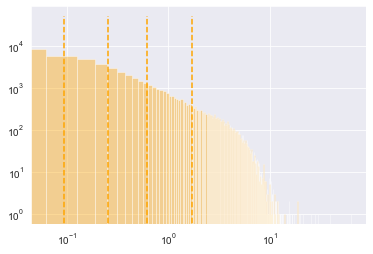

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

colors = ["#F4EA2D","#D4AA20","#EB9C2F","#D45920","#F73025"]
# for split_count,q in enumerate(range(0,100,20)):
#     split1 = np.quantile(gen1s["densitys"],q/100)
#     split2 = np.quantile(gen1s["densitys"],(q+20)/100)
#     plt.fill_between([split1,split2],0,50000,facecolor=colors[split_count],alpha = 0.3)
sns.distplot(gen1s["densitys"],bins=1000,kde=False,color="orange")
i = 0
start = 0
for split_count,q in enumerate(range(20,100,20)):
    split = np.quantile(gen1s["densitys"],q/100)
    plt.vlines(split, 0, 50000,color="orange",linestyle="--",)
        # if ax.patches[j].get_x() < split:
        #     plt.fill_between([start,ax.patches[j].get_x()],0,ax.patches[j].get_height(),facecolor=colors[split_count])
        #     print("continue",start,ax.patches[j].get_x())
        #     start = ax.patches[j].get_x()
        # else:
        #     plt.fill_between([start,split],0,ax.patches[j].get_height(),facecolor=colors[split_count])
        #     print("split",start,split)
        #     start = split
        #     i = j + 1
        #     break
plt.yscale("log")
plt.xscale("log")

<ipython-input-104-a81e7f6780b7>:25: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,100)


(0.010457642263262795, 100)

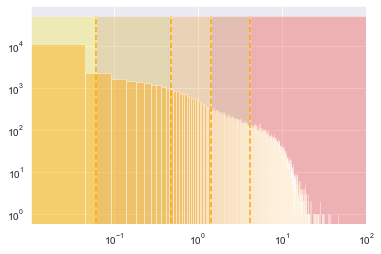

In [104]:
gen4s = np.load("/Users/harmonialeo/Downloads/result_allinone/gt_gen4.npz")
colors = ["#F4EA2D","#D4AA20","#EB9C2F","#D45920","#F73025"]
for split_count,q in enumerate(range(0,100,20)):
    split1 = np.quantile(gen4s["densitys"],q/100)
    split2 = np.quantile(gen4s["densitys"],(q+20)/100)
    plt.fill_between([split1,split2],0,50000,facecolor=colors[split_count],alpha = 0.3)
sns.distplot(gen4s["densitys"][gen4s["densitys"]<100],bins=1000,kde=False,color="orange")
i = 0
start = 0
for split_count,q in enumerate(range(20,100,20)):
    split = np.quantile(gen4s["densitys"],q/100)
    plt.vlines(split, 0, 50000,color="orange",linestyle="--",)
        # if ax.patches[j].get_x() < split:
        #     plt.fill_between([start,ax.patches[j].get_x()],0,ax.patches[j].get_height(),facecolor=colors[split_count])
        #     print("continue",start,ax.patches[j].get_x())
        #     start = ax.patches[j].get_x()
        # else:
        #     plt.fill_between([start,split],0,ax.patches[j].get_height(),facecolor=colors[split_count])
        #     print("split",start,split)
        #     start = split
        #     i = j + 1
        #     break
plt.yscale("log")
plt.xscale("log")
plt.xlim(0,100)